# TASK 1 - EXPLORATORY DATA ANALYSIS ON TERRORISM DATA SET


In [1]:
# IMPORTING ALL THE NECESSARY PACKAGES :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
# IMPORTING THE FILE USING PANDAS LIBRARY :

df = pd.read_csv(r"C:\Users\mohamed malhan\Desktop\ml\globalterrorism.csv", engine = 'python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# LIST OF COLUMNS PRESENT IN THE DATA SET 

df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
# Changing the column names into our convenience

df.rename(columns={'iyear':'year','imonth':'month','country_txt':'countries','region_txt':'region','city':'city','location':'loc',
                   'attacktype1_txt':'attacktype','targtype1_txt':'target','weaptype1_txt':'weapon','nwound':'wound','gname':'gang',
                  'nkill':'kills'},inplace=True)
          

In [5]:
# Selecting only the columns which we are going to use in our analysis 

df=df[['year','month','countries','region','city','loc','attacktype','target','weapon','wound','kills','success','gang']]
df.head()


,year,month,countries,region,region,city,loc,attacktype,target,weapon,wound,kills,success,gang
0,1970,7,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,Assassination,Private Citizens & Property,Unknown,0.0,1.0,1,MANO-D
1,1970,0,Mexico,1,North America,Mexico city,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,1,23rd of September Communist League
2,1970,1,Philippines,5,Southeast Asia,Unknown,NaN,Assassination,Journalists & Media,Unknown,0.0,1.0,1,Unknown
3,1970,1,Greece,8,Western Europe,Athens,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,1,Unknown
4,1970,1,Japan,4,East Asia,Fukouka,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,1,Unknown


In [6]:
# Statistical details of the given data set

df.describe()

,year,month,region,wound,kills,success
count,181691.000000,181691.000000,181691.000000,165380.000000,171378.000000,181691.000000
mean,2002.638997,6.467277,7.160938,3.167668,2.403272,0.889598
std,13.259430,3.388303,2.933408,35.949392,11.545741,0.313391
min,1970.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,5.000000,0.000000,0.000000,1.000000
50%,2009.000000,6.000000,6.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,10.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,12.000000,8191.000000,1570.000000,1.000000


In [7]:
# Searching for any null values in the data set

df.isnull().sum()

# We can observe that the fields 'city,loc,wound,kills' have null values

year               0
month              0
countries          0
region             0
region             0
city             434
loc           126196
attacktype         0
target             0
weapon             0
wound          16311
kills          10313
success            0
gang               0
dtype: int64

In [8]:
# Attempting to remove those null values and replacing it with 0

df[['wound','kills']]= df[['wound','kills']].replace(np.NaN,0)

In [9]:
# The non-null count and data type of the fields is shown 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        181691 non-null  int64  
 1   month       181691 non-null  int64  
 2   countries   181691 non-null  object 
 3   region      181691 non-null  int64  
 4   region      181691 non-null  object 
 5   city        181257 non-null  object 
 6   loc         55495 non-null   object 
 7   attacktype  181691 non-null  object 
 8   target      181691 non-null  object 
 9   weapon      181691 non-null  object 
 10  wound       181691 non-null  float64
 11  kills       181691 non-null  float64
 12  success     181691 non-null  int64  
 13  gang        181691 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 19.4+ MB


Text(0.5, 1.0, 'YEAR WITH HIGHEST ATTACKS')

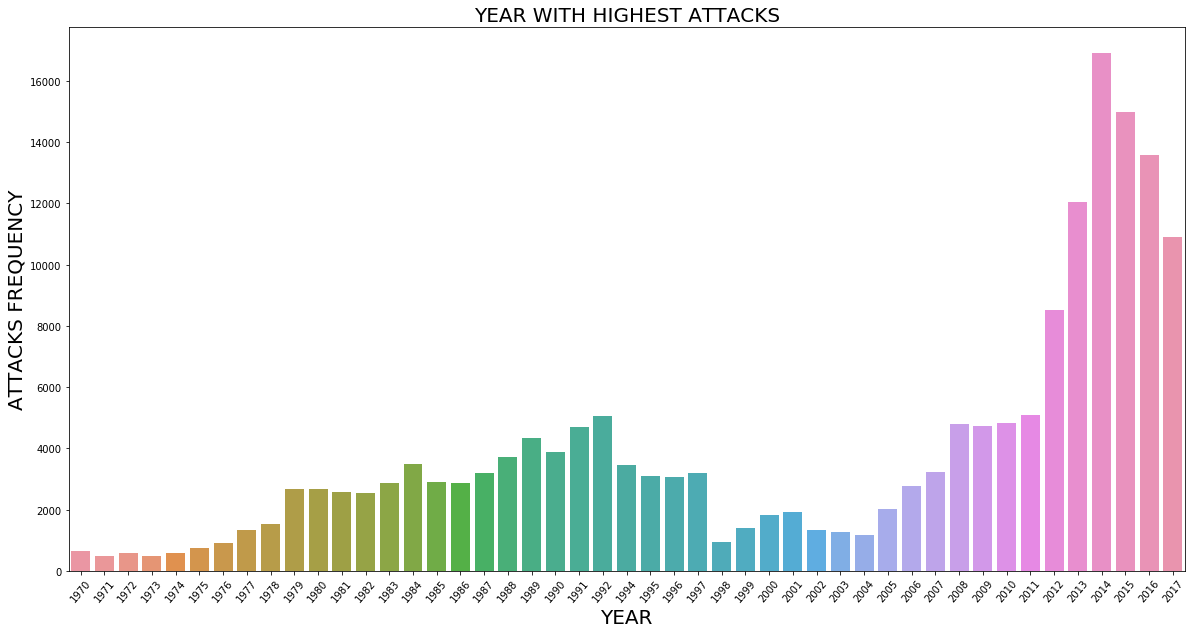

In [51]:
# By the graph we can see that during the year 2014 the highest no. of attacks have been occured

plt.figure(figsize=(20,10))
sns.barplot(x=df['year'].value_counts().sort_index().index, y=df['year'].value_counts().sort_index())
plt.xticks(rotation=50)
plt.xlabel('YEAR' , fontsize=20)
plt.ylabel('ATTACKS FREQUENCY' , fontsize=20)
plt.title('YEAR WITH HIGHEST ATTACKS', fontsize= 20)

Text(0.5, 1.0, 'TOP 10 COUNTRY WITH HIGHEST ATTACKS')

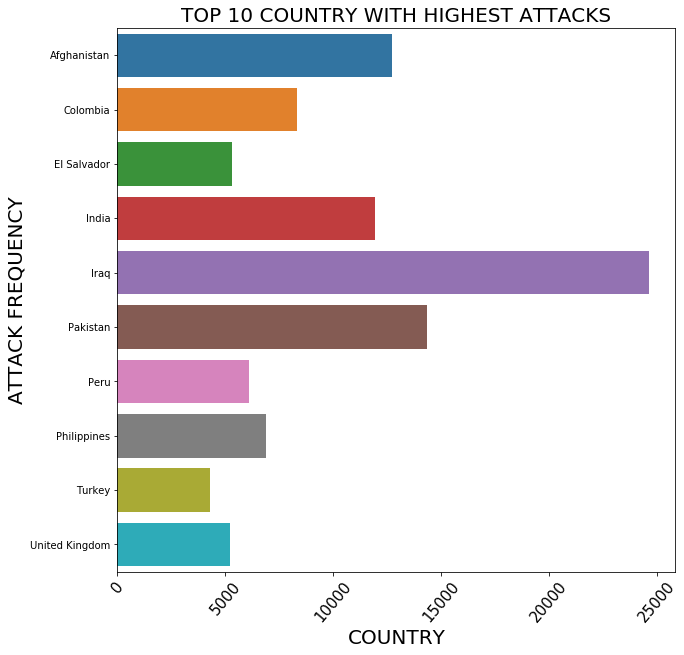

In [20]:
# "IRAQ" is the country where more number of attacks have been occured followed by "PAKISTAN and AFGHANISTAN"

plt.figure(figsize=(10,10))
sns.barplot(x= df['countries'].value_counts().nlargest(n=10).sort_index(),y=  df['countries'].value_counts().nlargest(n=10).sort_index().index )
plt.xlabel('COUNTRY', fontsize=20)
plt.ylabel('ATTACK FREQUENCY',fontsize =20)
plt.xticks(rotation=50, fontsize = 15)
plt.title('TOP 10 COUNTRY WITH HIGHEST ATTACKS', fontsize=20)

In [19]:
df['city'].value_counts().sort_index()



62 miles South of Dushanbe     1
A Coruna district             20
A'arbaniyeh                    1
ANkara                         1
Aab Kamra                      1
                              ..
vinchos                        1
wakunai                        1
yacan                          1
yokohama                       1
zinarag                        1
Name: city, Length: 36674, dtype: int64

Text(0.5, 1.0, 'TOP 10 CITIES WITH HIGHEST ATTACKS')

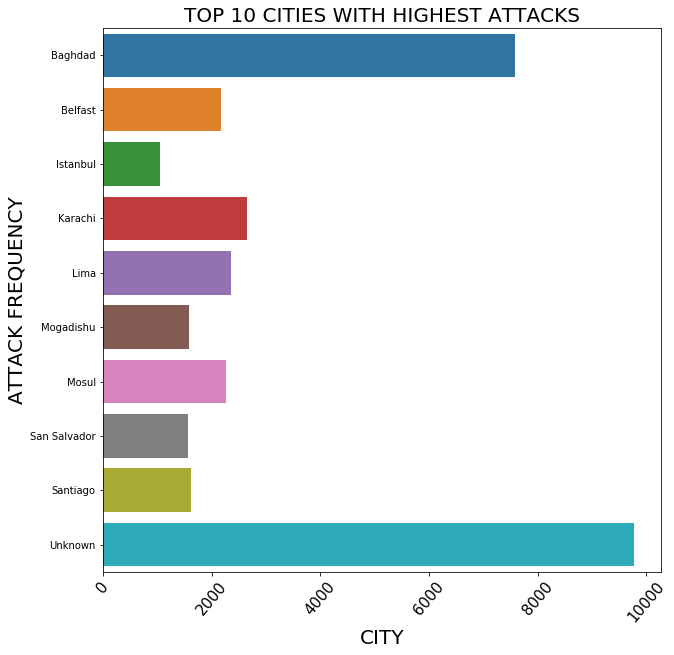

In [18]:
# It is obvious that under the top 10 cities the city with unknown name has the highest count followed by "BAGHDAD"

plt.figure(figsize=(10,10))
sns.barplot(x= df['city'].value_counts().nlargest(n=10).sort_index(),y=  df['city'].value_counts().nlargest(n=10).sort_index().index )
plt.xlabel('CITY', fontsize=20)
plt.ylabel('ATTACK FREQUENCY',fontsize =20)
plt.xticks(rotation=50, fontsize = 15)
plt.title('TOP 10 CITIES WITH HIGHEST ATTACKS', fontsize=20)

Text(0.5, 1.0, 'TYPE OF ATTACK')

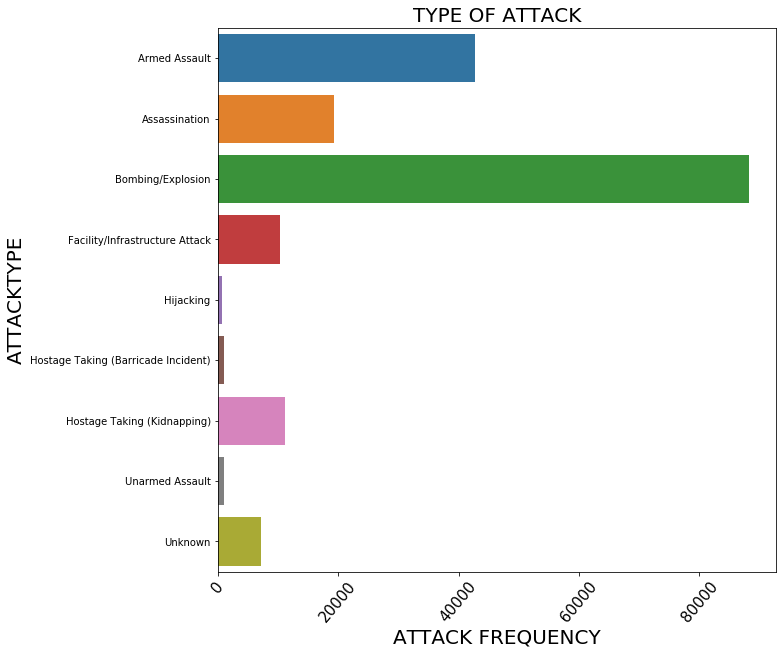

In [20]:
# Barplot shows that "BOMBERING and EXPLOTION" have occured several times through out the consecutive years

plt.figure(figsize=(10,10))
sns.barplot(x= df['attacktype'].value_counts().nlargest(n=10).sort_index(),y=  df['attacktype'].value_counts().nlargest(n=10).sort_index().index )
plt.xlabel('ATTACK FREQUENCY', fontsize=20)
plt.ylabel('ATTACKTYPE',fontsize =20)
plt.xticks(rotation=50, fontsize = 15)
plt.title('TYPE OF ATTACK', fontsize=20)

In [13]:
#By the adjustable graph we can clearly differentiate the number of attacks occured every year.

plot = px.Figure(data=[px.Scatter(
    x=df['year'].value_counts(),y=df['year'].value_counts().index,
    mode='lines',)])
  
plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),])),
        rangeslider=dict(visible=True),))
plot.show()

#This clearly shows that the year 2014 has the highest attack count

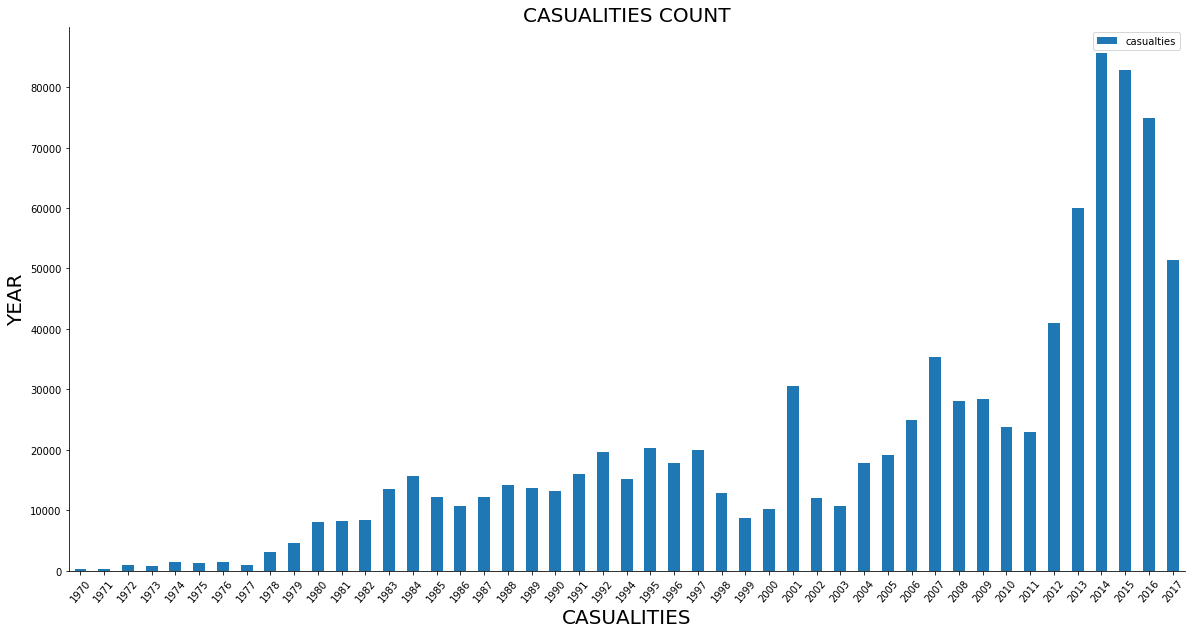

In [12]:
''' By the barplot the large number of casualties were recorded in the year 2014 which is the same year in which highest number 
of attacks have been occured''' 

df['casualties']=df['kills']+df['wound']
data = df[['year','casualties']].groupby(['year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
data.plot(kind='bar', ax= ax4)
plt.xticks(rotation =50)
plt.title('CASUALITIES COUNT', fontsize=20)
plt.xlabel('CASUALITIES', fontsize=20)
plt.ylabel('YEAR', fontsize=20)
t_side=ax4.spines['top']
t_side.set_visible(False)
r_side=ax4.spines['right']
r_side.set_visible(False)


Text(0.5, 1.0, 'BASED ON CASUALTIES')

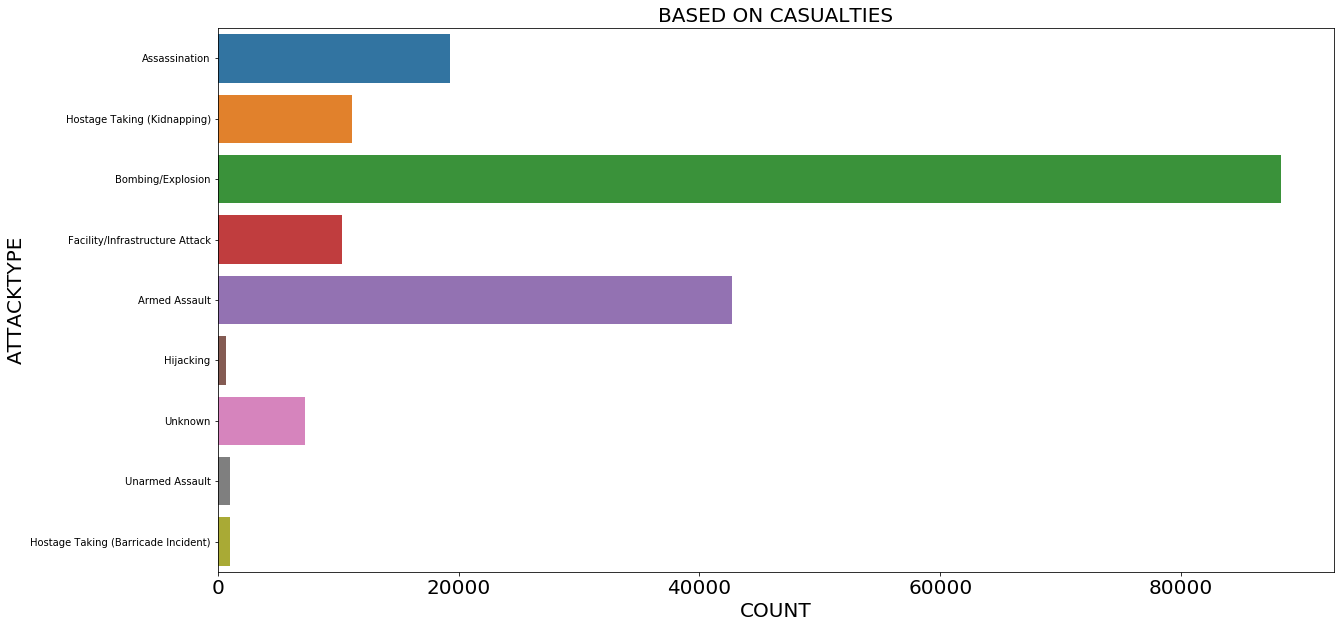

In [21]:
# More number of casualties were affected by "Bombering or Explotion" type of attack 

plt.figure(figsize=(20,10))
data1 = df[['success','casualties','attacktype']]
sns.countplot(y=data1['attacktype'], data=data1)
plt.xlabel('COUNT', fontsize =20)
plt.ylabel('ATTACKTYPE', fontsize=20)
plt.xticks(fontsize=20)
plt.title('BASED ON CASUALTIES',fontsize=20)

# CONCLUTION

1/ Highest number of attacks were noticed by the year 2014 , which has been reduced in the succeeding years (2015-2017)

2/ According to the given data set the Hot zone for terrorism is the city "BHAGDAD" of country "IRAQ" which has the highest 
 number of attacks , followed by the countries "Pakistan and Afghanistan"
 
3/ The attack type which have occured frequently as well as created more impact on the public were "Bombing/Explotion and Armed Assault" .

4/ The more number of Casulaties were affected by "Bombing/Explotion" by the year "2014" .